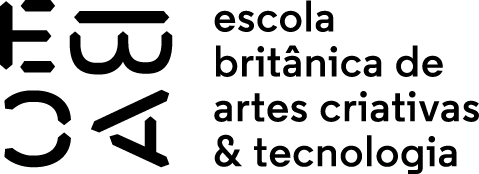

Profissão: Cientista de Dados

Módulo 14 | Scripting | Exercício 1

In [11]:
pwd

'C:\\Users\\medei\\Documents\\Projetos\\Mod14 Tarefa_01'

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

sns.set_theme()

def plot_pivot_table(df: pd.DataFrame, 
                     value: str, 
                     index: str, 
                     func: str, 
                     ylabel: str, 
                     xlabel: str, 
                     opcao: str='nenhuma'
                    ) -> None:
    if opcao == 'nenhuma':
        pd.pivot_table(data=df, 
                       values=value, 
                       index=index,
                       aggfunc=func
                      ).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(data=df, 
                       values=value, 
                       index=index,
                       aggfunc=func
                      ).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(data=df, 
                       values=value, 
                       index=index,
                       aggfunc=func
                      ).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None


meses = ['MAR', 'ABR', 'MAI', 'JUN', 'DEZ']

for mes in meses:
    sinasc = pd.read_csv('./input/SINASC_RO_2019_'+mes+'.csv')

    max_data = sinasc.DTNASC.max()[:7]
    os.makedirs('./output/figs/'+max_data, exist_ok=True)

    plot_pivot_table(df=sinasc, 
                     value='IDADEMAE', 
                     index='DTNASC', 
                     func='count', 
                     ylabel='Quantidade de nascimentos', 
                     xlabel='Data de nascimento')
    plt.savefig('./output/figs/'+max_data+'/Quantidade de nascimentos.png')
    plt.close()

    plot_pivot_table(df=sinasc, 
                     value='IDADEMAE', 
                     index=['DTNASC', 'SEXO'], 
                     func='mean', 
                     ylabel='Média da idade das mães', 
                     xlabel='Data de nascimento', 
                     opcao='unstack')
    plt.savefig('./output/figs/'+max_data+'/Média da idade das mães por sexo.png')
    plt.close()

    plot_pivot_table(df=sinasc, 
                     value='PESO', 
                     index=['DTNASC', 'SEXO'], 
                     func='mean', 
                     ylabel='Média do peso dos bebês', 
                     xlabel='Data de nascimento',
                     opcao='unstack')
    plt.savefig('./output/figs/'+max_data+'/Média do peso dos bebês por sexo.png')
    plt.close()

    plot_pivot_table(df=sinasc, 
                     value='APGAR1', 
                     index='ESCMAE', 
                     func='median', 
                     ylabel='Mediana do APGAR1', 
                     xlabel='Escolaridade',
                     opcao='sort')
    plt.savefig('./output/figs/'+max_data+'/Mediana do APGAR1 por escolaridade das mães.png')
    plt.close()

    plot_pivot_table(df=sinasc, 
                     value='APGAR1', 
                     index='GESTACAO', 
                     func='mean', 
                     ylabel='Média do APGAR1', 
                     xlabel='Gestação',
                     opcao='sort')
    plt.savefig('./output/figs/'+max_data+'/Média do APGAR1 por gestação.png')
    plt.close()

    plot_pivot_table(df=sinasc, 
                     value='APGAR5', 
                     index='GESTACAO', 
                     func='mean', 
                     ylabel='Média do APGAR5', 
                     xlabel='Gestação',
                     opcao='sort')
    plt.savefig('./output/figs/'+max_data+'/Média do APGAR5 por gestação.png')
    plt.close()
    
    print('Data inicial:', sinasc.DTNASC.min(), 
          'Data final:', sinasc.DTNASC.max())
    print('Nome da pasta:', max_data, '\n')

Data inicial: 2019-01-01 Data final: 2019-03-31
Nome da pasta: 2019-03 

Data inicial: 2019-01-01 Data final: 2019-04-30
Nome da pasta: 2019-04 

Data inicial: 2019-01-01 Data final: 2019-05-31
Nome da pasta: 2019-05 

Data inicial: 2019-01-01 Data final: 2019-06-30
Nome da pasta: 2019-06 

Data inicial: 2019-01-01 Data final: 2019-12-31
Nome da pasta: 2019-12 



Uma forma de deixar o processo de geração de gráficos mais automatizado seria organizar o código para que ele não dependa diretamente de nomes fixos de arquivos ou de parâmetros definidos manualmente para cada gráfico. Ao invés de escrever um bloco de código para cada variável ou mês, seria possível criar funções mais genéricas que recebem como entrada o nome da variável, o tipo de agregação e o título do gráfico, e a partir disso já criam, salvam e organizam os arquivos automaticamente. Também ajudaria muito fazer a leitura automática dos arquivos da pasta, sem precisar listar manualmente os meses, permitindo que qualquer novo arquivo que for adicionado à pasta já seja considerado automaticamente na análise. Isso torna o código muito mais flexível e reaproveitável, principalmente se futuramente forem incluídos dados de outros anos ou meses adicionais. Outra coisa que facilitaria bastante seria armazenar as informações necessárias para os gráficos, como os eixos e os títulos, em uma estrutura como uma lista de dicionários, pois assim o código poderia percorrer essa lista e gerar tudo de uma vez, sem repetição. Dessa forma, o trabalho de atualizar ou adaptar os gráficos para novos períodos seria mínimo e não exigiria quase nenhuma modificação no código original.